In [1]:
# Paul's work
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
%matplotlib inline

file_to_load = "Data/3401015_table1_total_arrival_by_visa.csv"
file_to_load2 = "Data/3401015_total_departures_by_visa.csv"
total_arr_visa = pd.read_csv(file_to_load)
total_dep_visa = pd.read_csv(file_to_load2)
arr_visa_df = pd.DataFrame(total_arr_visa)
dep_visa_df = pd.DataFrame(total_dep_visa)
# arr_visa_df.loc[(arr_visa_df['Month']=='Jan-16')]

In [3]:
# total arrivals from Jan-2016 including permanent visas and temporary visas
arr_df_16 = arr_visa_df.iloc[138:]
arr_df_16 = arr_df_16.reset_index(drop=True)
arr_df_16.head()

,Month,Special Category Visa (subclass 444)(e),Permanent Family Visas,Permanent Skilled Visas,Permanent Other Visas,Temporary Student Visas,Temporary Skilled Visas,Temporary Visitor Visas,Temporary Work Visas,Temporary Other Visas,Other Visas(f),Total(g)
0,Jan-16,169140.0,32630.0,75710.0,60480.0,70560.0,41290.0,396630.0,26270.0,28250.0,2680.0,1908270.0
1,Feb-16,119770.0,25000.0,45470.0,37360.0,138770.0,20510.0,547690.0,23540.0,24840.0,6380.0,1560130.0
2,Mar-16,144630.0,23820.0,37010.0,36200.0,47360.0,20510.0,534420.0,21960.0,22250.0,8150.0,1479930.0
3,Apr-16,153260.0,23450.0,42920.0,42410.0,33840.0,21800.0,402030.0,19700.0,18730.0,8290.0,1473700.0
4,May-16,136710.0,22700.0,35730.0,38250.0,21500.0,20520.0,358680.0,18270.0,17270.0,7380.0,1304820.0


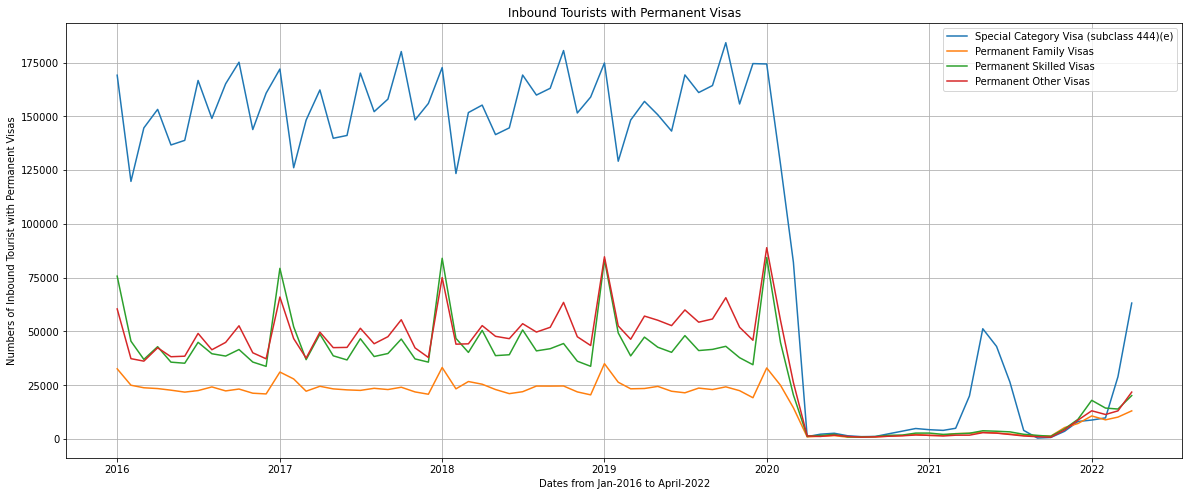

In [495]:
# # calculate inboud trave with permement visa total figure each monthsince 2016 
arr_permnt= arr_df_16.iloc[:,:5]
arr_permnt['Total_Permanent_Visa'] = arr_permnt['Special Category Visa (subclass 444)(e)']+arr_permnt['Permanent Family Visas']+arr_permnt['Permanent Skilled Visas']+arr_permnt['Permanent Other Visas']
arr_permnt = arr_permnt.reset_index(drop=True)
arr_permnt = arr_permnt.dropna(how='any')
arr_permnt['Month'] = pd.to_datetime(arr_permnt['Month'], format='%b-%y')
arr_permnt.set_index('Month', inplace=True)

# ax = plt.axes()
# ax.set_facecolor('silver')
plt.plot(arr_permnt.drop(columns=['Total_Permanent_Visa']))
plt.legend(arr_permnt.columns)
plt.xlabel('Dates from Jan-2016 to April-2022')
plt.ylabel('Numbers of Inbound Tourist with Permanent Visas')
plt.title('Inbound Tourists with Permanent Visas')
plt.savefig("Plots/Inbound Tourists with Permanent Visas——1")
plt.grid()


/Users/tony/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


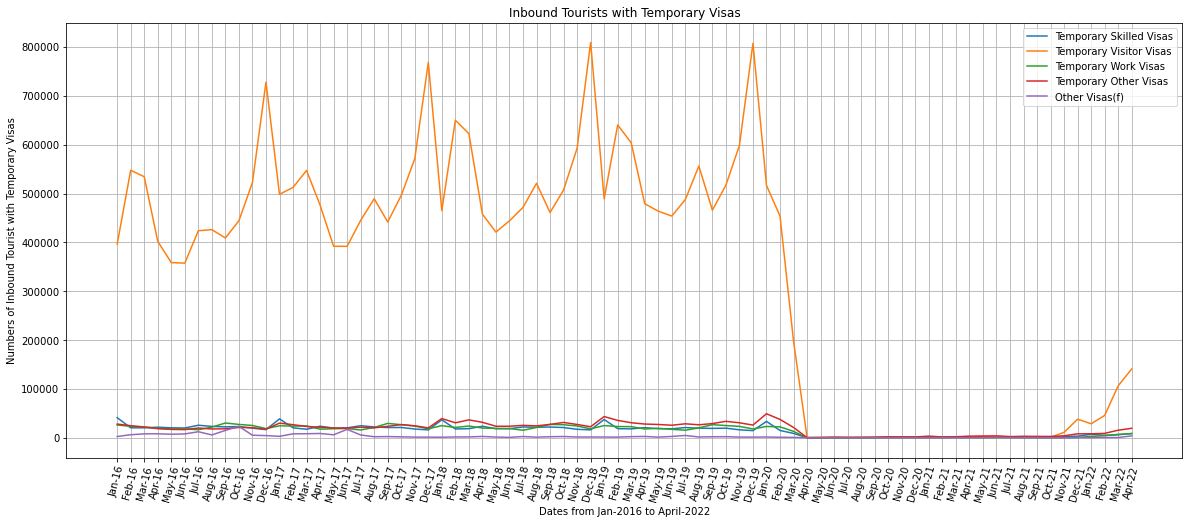

<Figure size 1440x576 with 0 Axes>

In [486]:
# Inbound tourists with Temporary visas since 2016
arr_temp = arr_df_16.iloc[:,[0,6,7,8,9,10]]
arr_temp['Total_Temporary_Visa'] = arr_temp['Temporary Skilled Visas']+arr_temp['Temporary Visitor Visas']+arr_temp['Temporary Work Visas']+arr_temp['Temporary Other Visas']+arr_temp['Other Visas(f)']
# arr_temp = arr_temp.reset_index(drop=True)
arr_temp = arr_temp.dropna(how='any')
arr_temp.set_index('Month',inplace=True)
arr_temp

plt.grid()
plt.plot(arr_temp.drop(columns=['Total_Temporary_Visa']))
plt.xlabel('Dates from Jan-2016 to April-2022')
plt.ylabel('Numbers of Inbound Tourist with Temporary Visas')
plt.xticks(rotation=75)
plt.legend(arr_temp.drop(columns=['Total_Temporary_Visa']).columns)
plt.title('Inbound Tourists with Temporary Visas')

plt.savefig("Plots/Inbound Tourists with Temporary Visas——2")
plt.show()

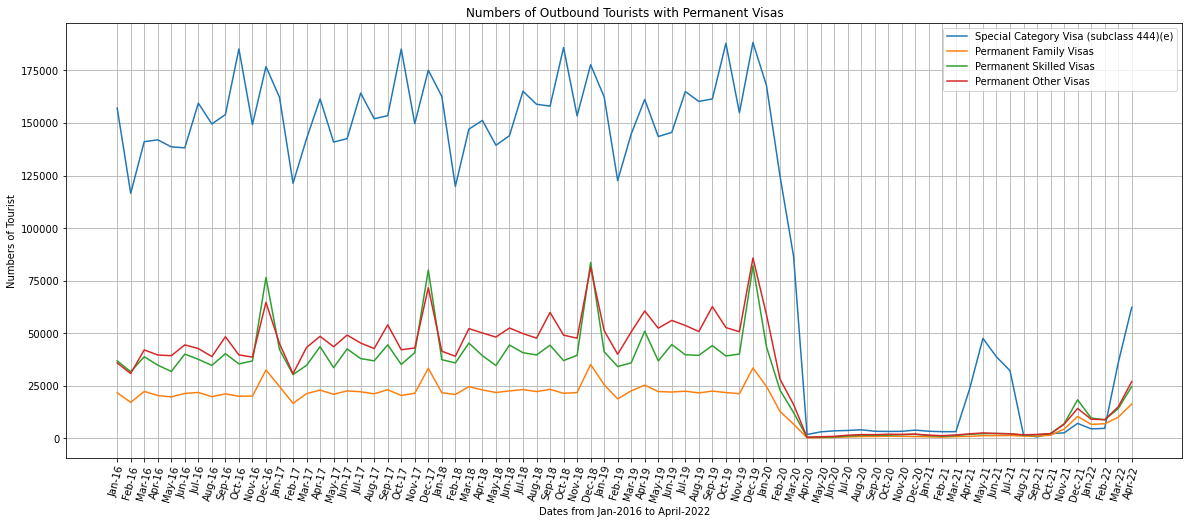

In [487]:
dep_visa_df.loc[(dep_visa_df['Month']=='Jan-16')]
dep_df =dep_visa_df.iloc[138:].dropna(how='any').reset_index(drop=True)
dep_permnt = dep_df.iloc[:,:5]
dep_permnt['Permanent Total'] = dep_permnt['Special Category Visa (subclass 444)(e)']+dep_permnt['Permanent Family Visas']+dep_permnt['Permanent Skilled Visas']+dep_permnt['Permanent Other Visas']
dep_permnt.set_index('Month', inplace=True)
dep_permnt
plt.grid()
plt.plot(dep_permnt.drop(columns='Permanent Total'))
plt.xticks(rotation= 75)
plt.legend(dep_permnt.columns)
plt.xlabel('Dates from Jan-2016 to April-2022')
plt.ylabel('Numbers of Tourist')
plt.title('Numbers of Outbound Tourists with Permanent Visas')
plt.savefig("Plots/Numbers of Outbound Tourists with Permanent Visas——3")

/Users/tony/opt/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


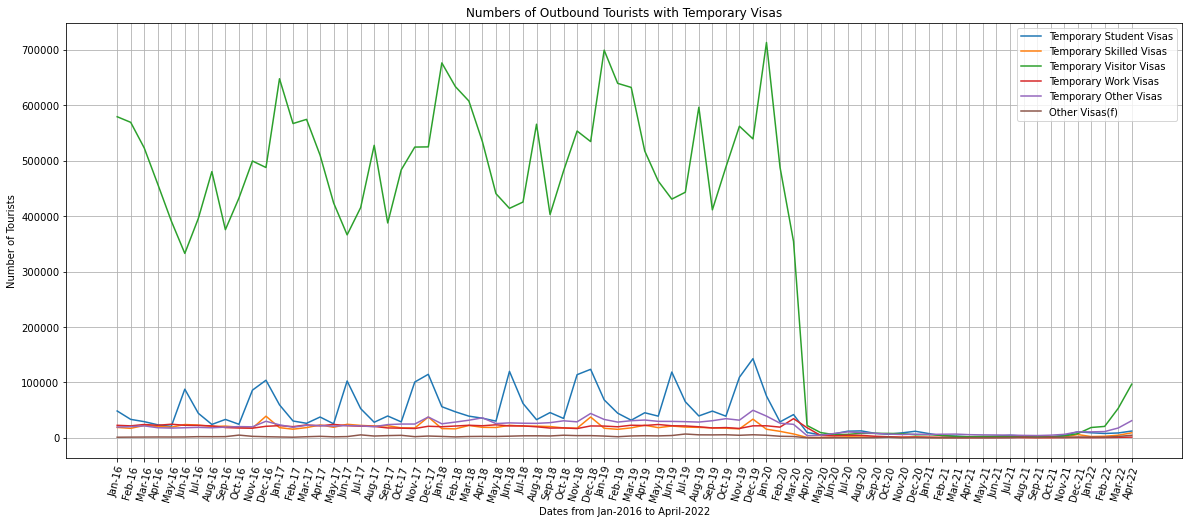

In [488]:
dep_temp = dep_df.iloc[:,[0,5,6,7,8,9,10]]
dep_temp['Total Temporary Visa'] = dep_temp['Temporary Student Visas']+dep_temp['Temporary Skilled Visas']+dep_temp['Temporary Visitor Visas']+dep_temp['Temporary Work Visas'] + dep_temp['Temporary Other Visas']+dep_temp['Other Visas(f)']
dep_temp.set_index('Month', inplace=True)
plt.grid()
plt.plot(dep_temp.drop(columns='Total Temporary Visa'))
plt.xticks(rotation= 75)
plt.legend(dep_temp.columns)
plt.xlabel('Dates from Jan-2016 to April-2022')
plt.title('Numbers of Outbound Tourists with Temporary Visas')
plt.ylabel('Number of Tourists')
plt.savefig("Plots/Numbers of Outbound Tourists with Temporary Visa——4")

In [253]:
#Analyzing short_term visitors return: file : short_term_reason.csv
file_shrot_term_reason = '/Users/tony/Documents/GitHub/project_1/project-1-group-10/data/short_term_reason.csv'
short_term_reason = pd.read_csv(file_shrot_term_reason)
short_term_reason = short_term_reason.rename(columns={'Unnamed: 0':'Month'})
short_term_reason['Less a month']= short_term_reason.iloc[:,[1,2,3]].sum(axis=1)
short_term_reason['Between 1 to 3 months'] = short_term_reason.iloc[:,[4,5]].sum(axis=1)
short_term_reason['Between 3 to 6 months']= short_term_reason.iloc[:,6]
short_term_reason['Between 6 to 12 months']= short_term_reason.iloc[:,7]
short_term_reason['Arriving for conference']= short_term_reason.iloc[:,9]
short_term_reason['Arriving for business']= short_term_reason.iloc[:,10]
short_term_reason ['Arrving for friends/relatives']= short_term_reason.iloc[:,11]
short_term_reason['Arriving for holiday'] = short_term_reason.iloc[:,12]
short_term_reason['Arriving for work']= short_term_reason.iloc[:,13]
short_term_reason['Arriving for education'] = short_term_reason.iloc[:,14]
short_term_reason['Arriving reason unknown']= short_term_reason.iloc[:,15]
short_term_reason= short_term_reason.iloc[:,[0,17,18,19,20,21,22,23,24,25,26,27]]
# short_term_reason = short_term_reason.set_index('Month')
short_term_reason.loc[(short_term_reason['Month']=='Jan-2016')]
short_term_reason = short_term_reason.iloc[300:]

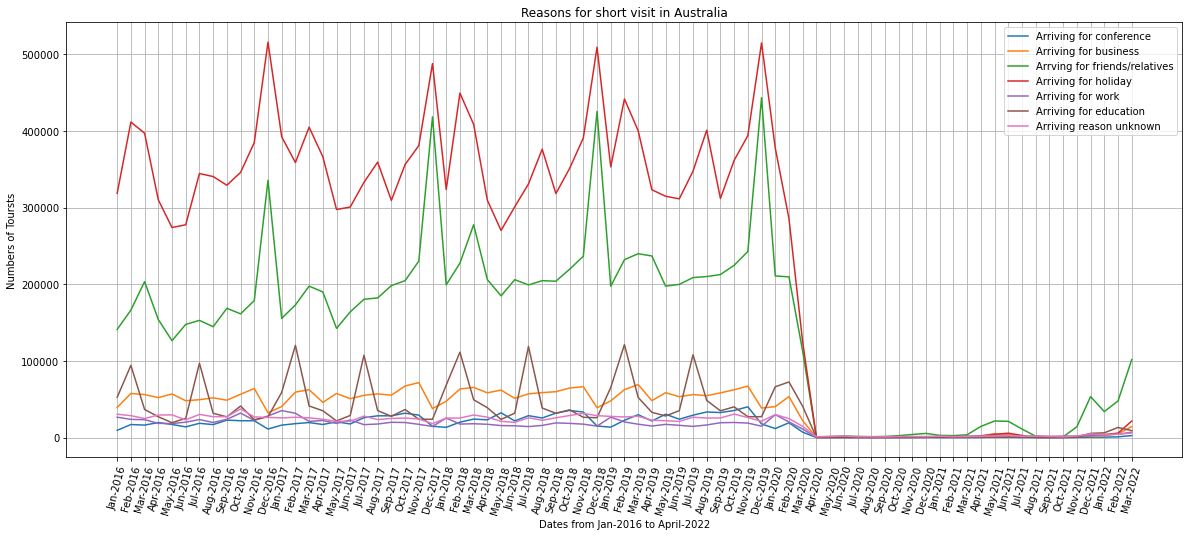

In [489]:
x = short_term_reason['Month']
y = short_term_reason.iloc[:,5:]
plt.grid()
plt.xticks(rotation=75)
plt.plot(x,y)
plt.legend(short_term_reason.iloc[:,5:].columns)
plt.xlabel('Dates from Jan-2016 to April-2022')
plt.title('Reasons for short visit in Australia')
plt.ylabel('Numbers of Toursts')
plt.savefig("Plots/Reasons for short visit in Australia——5")

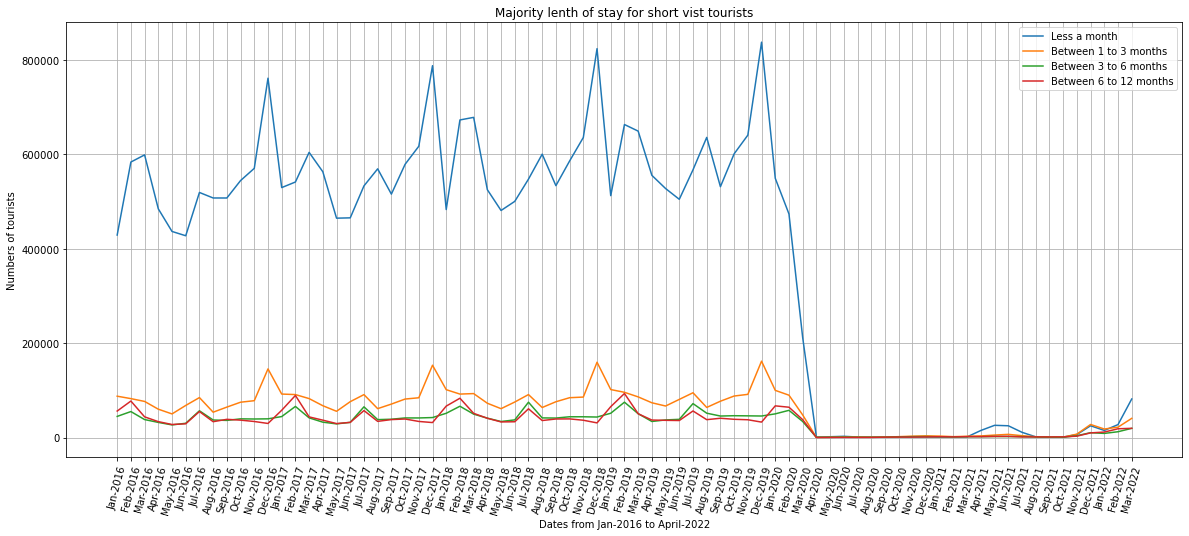

In [490]:
x = short_term_reason['Month']
y = short_term_reason.iloc[:,1:5]
plt.grid()
plt.xticks(rotation=75)
plt.plot(x,y)
plt.xlabel('Dates from Jan-2016 to April-2022')
plt.ylabel('Numbers of tourists')
plt.title('Majority lenth of stay for short vist tourists')
plt.legend(short_term_reason.iloc[:,1:5].columns)
plt.savefig("Plots/Majority lenth of stay for short vist tourists——6")

In [350]:
file_residents = '/Users/tony/Documents/GitHub/project_1/project-1-group-10/data/short_term_residents.csv'
short_term_residents = pd.read_csv(file_residents)

In [351]:
short_term_residents= short_term_residents.rename(columns= {
    'Unnamed: 0':'Month',
    'Number of movements ;  New Zealand ;  Short-term Residents returning ;':'New Zealand',
    'Number of movements ;  New Caledonia ;  Short-term Residents returning ;':'New Caledonia',
    'Number of movements ;  Papua New Guinea ;  Short-term Residents returning ;':'Papua New Guinea',
    'Number of movements ;  Vanuatu ;  Short-term Residents returning ;':'Vanuatu',
    'Number of movements ;  Fiji ;  Short-term Residents returning ;': 'Fiji',
    'Number of movements ;  Samoa ;  Short-term Residents returning ;':'Samoa',
    'Number of movements ;  Other Oceania and Antarctica ;  Short-term Residents returning ;':'Other Oceania and Antarctica',
    'Number of movements ;  Total Oceania and Antarctica ;  Short-term Residents returning ;':'Total Oceania and Antarctica',
    'Number of movements ;  UK, CIs & IOM ;  Short-term Residents returning ;':'UK, CIs & IOM',
    'Number of movements ;  Ireland ;  Short-term Residents returning ;':'Ireland',
    'Number of movements ;  Austria ;  Short-term Residents returning ;':'Austria',
    'Number of movements ;  France ;  Short-term Residents returning ;':'France',
    'Number of movements ;  Germany ;  Short-term Residents returning ;':'Germany',
    'Number of movements ;  Netherlands ;  Short-term Residents returning ;':'Netherlands',
    'Number of movements ;  Switzerland ;  Short-term Residents returning ;':'Switzerland',
   'Number of movements ;  Sweden ;  Short-term Residents returning ;': 'Sweden',
   'Number of movements ;  Other North-West Europe ;  Short-term Residents returning ;': 'Other North-West Europe',
   'Number of movements ;  Total North-West Europe ;  Short-term Residents returning ;':'Total North-West Europe',
   'Number of movements ;  Italy ;  Short-term Residents returning ;':'Italy',
   'Number of movements ;  Portugal ;  Short-term Residents returning ;':'Portugal',
   'Number of movements ;  Spain ;  Short-term Residents returning ;':'Spain',
   'Number of movements ;  Croatia ;  Short-term Residents returning ;':'Croatia',
   'Number of movements ;  Greece ;  Short-term Residents returning ;':'Greece',
   'Number of movements ;  Poland ;  Short-term Residents returning ;':'Poland',

   'Number of movements ;  Russian Federation ;  Short-term Residents returning ;':'Russian Federation',
       'Number of movements ;  Other Southern and Eastern Europe ;  Short-term Residents returning ;':'Other Southern and Eastern Europe',
       'Number of movements ;  Total Southern and Eastern Europe ;  Short-term Residents returning ;':'Total Southern and Eastern Europe',
       'Number of movements ;  Iran ;  Short-term Residents returning ;':'Iran',
       'Number of movements ;  Israel ;  Short-term Residents returning ;':'Israel',
       'Number of movements ;  Lebanon ;  Short-term Residents returning ;':'Lebanon',
       'Number of movements ;  Turkey ;  Short-term Residents returning ;':'Turkey',
       'Number of movements ;  United Arab Emirates ;  Short-term Residents returning ;':'United Arab Emirates',
       'Number of movements ;  Other North Africa and the Middle East ;  Short-term Residents returning ;':'Other North Africa and the Middle East',
       'Number of movements ;  Total North Africa and the Middle East ;  Short-term Residents returning ;':'Total North Africa and the Middle East',
       'Number of movements ;  Cambodia ;  Short-term Residents returning ;':'Cambodia',
       'Number of movements ;  Thailand ;  Short-term Residents returning ;':'Thailand',
       'Number of movements ;  Vietnam ;  Short-term Residents returning ;':'Vietnam',
       'Number of movements ;  Indonesia ;  Short-term Residents returning ;':'Indonesia',
       'Number of movements ;  Malaysia ;  Short-term Residents returning ;':'Malaysia',
       'Number of movements ;  Philippines ;  Short-term Residents returning ;':'Philippines',
       'Number of movements ;  Singapore ;  Short-term Residents returning ;':'Singapore',
       'Number of movements ;  Other South-East Asia ;  Short-term Residents returning ;':'Other South-East Asia',
       'Number of movements ;  Total South-East Asia ;  Short-term Residents returning ;':'Total South-East Asia',
       'Number of movements ;  China ;  Short-term Residents returning ;':'China',
       'Number of movements ;  Hong Kong ;  Short-term Residents returning ;':'Hong Kong',
       'Number of movements ;  Taiwan ;  Short-term Residents returning ;':'Taiwan',
       'Number of movements ;  Japan ;  Short-term Residents returning ;':'Japan',
       'Number of movements ;  Korea, South ;  Short-term Residents returning ;':'Korea, South',
       'Number of movements ;  Other North-East Asia ;  Short-term Residents returning ;':'Other North-East Asia',
       'Number of movements ;  Total North-East Asia ;  Short-term Residents returning ;':'Total North-East Asia',
       'Number of movements ;  Bangladesh ;  Short-term Residents returning ;':'Bangladesh',
       'Number of movements ;  India ;  Short-term Residents returning ;':'India',
       'Number of movements ;  Nepal ;  Short-term Residents returning ;':'Nepal',
       'Number of movements ;  Pakistan ;  Short-term Residents returning ;':'Pakistan',
       'Number of movements ;  Sri Lanka ;  Short-term Residents returning ;':'Sri Lanka',
       'Number of movements ;  Other Southern and Central Asia ;  Short-term Residents returning ;':'Other Southern and Central Asia',
       'Number of movements ;  Total Southern and Central Asia ;  Short-term Residents returning ;':'Total Southern and Central Asia',
       'Number of movements ;  Canada ;  Short-term Residents returning ;':'Canada',
       'Number of movements ;  United States of America ;  Short-term Residents returning ;':'United States of America',
       'Number of movements ;  Brazil ;  Short-term Residents returning ;':'Brazil',
       'Number of movements ;  Chile ;  Short-term Residents returning ;':'Chile',
       'Number of movements ;  Peru ;  Short-term Residents returning ;':'Peru',
       'Number of movements ;  Mexico ;  Short-term Residents returning ;':'Mexico',
       'Number of movements ;  Other Americas ;  Short-term Residents returning ;':'Other Americas',
       'Number of movements ;  Total Americas ;  Short-term Residents returning ;':'Total Americas',
       'Number of movements ;  South Africa ;  Short-term Residents returning ;':'South Africa',
       'Number of movements ;  Other Sub-Saharan Africa ;  Short-term Residents returning ;':'Other Sub-Saharan Africa',
       'Number of movements ;  Total Sub-Saharan Africa ;  Short-term Residents returning ;':'Total Sub-Saharan Africa',
       'Number of movements ;  Total (Country of stay/residence) ;  Short-term Residents returning ;':'Total (Country of stay/residence) '
    
    })

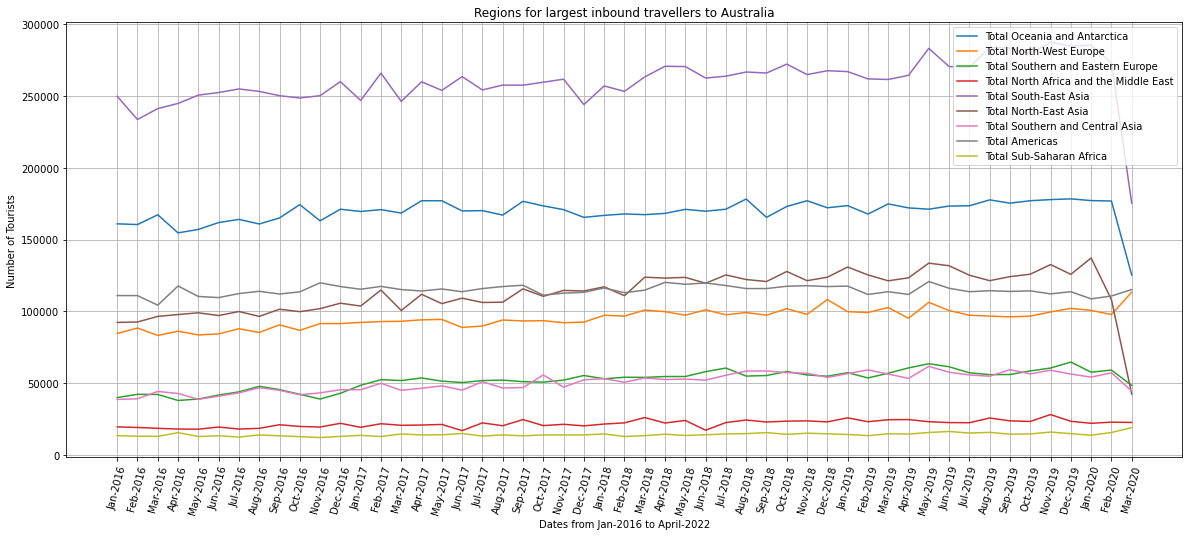

In [491]:
short_term_residents = short_term_residents.dropna(how='any')
short_term_total = short_term_residents[['Month','Total Oceania and Antarctica','Total North-West Europe','Total Southern and Eastern Europe','Total North Africa and the Middle East','Total South-East Asia','Total North-East Asia','Total Southern and Central Asia','Total Americas','Total Sub-Saharan Africa']]

short_term_total.loc[(short_term_total['Month']=='Jan-2016')]
plt.grid()
plt.xticks(rotation=75)
plt.plot(short_term_total.iloc[102:].set_index('Month'))
plt.legend(short_term_total.iloc[102:].drop(columns='Month').columns)
plt.xlabel('Dates from Jan-2016 to April-2022')
plt.ylabel('Number of Tourists')
plt.title('Regions for largest inbound travellers to Australia')
plt.savefig("Plots/Regions for largest inbound travellers to Australia——7")

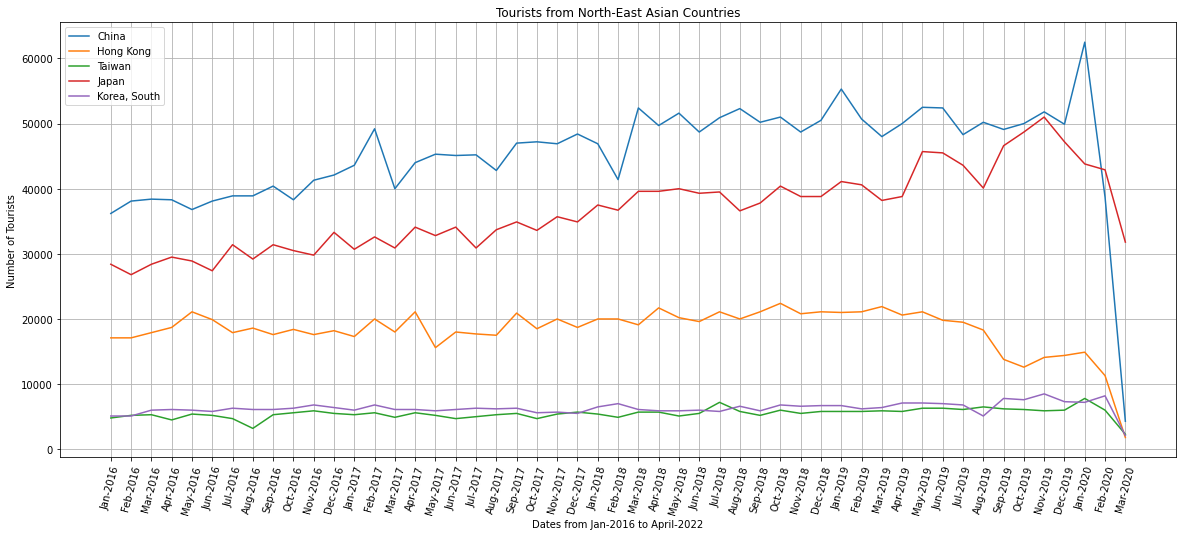

In [492]:
short_term_ne = short_term_residents.set_index('Month').iloc[:,43:48]
short_term_ne.iloc[102:]
plt.grid()
plt.xticks(rotation=75)
plt.plot(short_term_ne.iloc[102:])
plt.legend(short_term_ne.columns)
plt.xlabel('Dates from Jan-2016 to April-2022')
plt.ylabel('Number of Tourists')
plt.title('Tourists from North-East Asian Countries')
plt.savefig("Plots/Tourists from North-East Asian Countries——8")

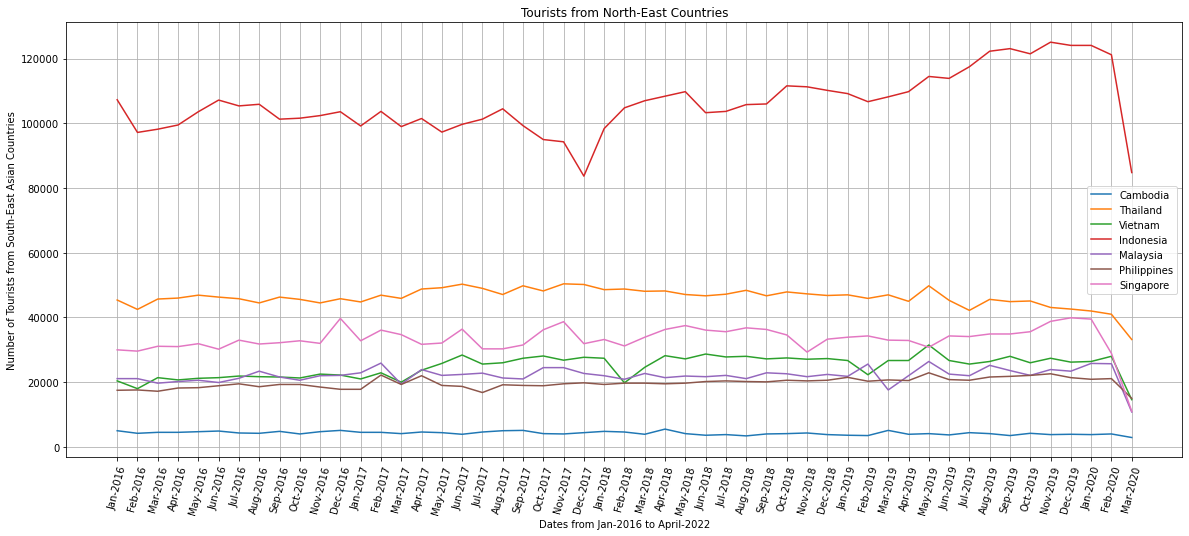

In [493]:
short_term_se = short_term_residents.set_index('Month').iloc[:,34:41]
short_term_se
short_term_se.iloc[102:]
plt.grid()
plt.xticks(rotation=75)
plt.plot(short_term_se.iloc[102:])
plt.legend(short_term_se.columns)
plt.xlabel('Dates from Jan-2016 to April-2022')
plt.title('Tourists from North-East Countries')
plt.ylabel('Number of Tourists from South-East Asian Countries')
plt.savefig("Plots/Number of Tourists from South-East Asian Countries——9")